In [2]:
import gdrive_refs as names
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
root = "./data/"
datasets = dict()
for name in names.gdrive_dic:
    address = root+name[1]
    datasets[name[1]] = pd.read_csv(address, on_bad_lines='skip')

# Checking for NaN values in datasets

After loading the datasets, we want to make sure it is exploitable and perform cleaning if necessary. To do so, we will print the heatmaps relating entries of datasates with a color indicating whether there is or not a NaN value in the data.

Progress: Step 1/26
Progress: Step 2/26
Progress: Step 3/26
Progress: Step 4/26
Progress: Step 5/26
Progress: Step 6/26
Progress: Step 7/26
Progress: Step 8/26
Progress: Step 9/26
Progress: Step 10/26
Progress: Step 11/26
Progress: Step 12/26
Progress: Step 13/26
Progress: Step 14/26
Progress: Step 15/26
Progress: Step 16/26
Progress: Step 17/26
Progress: Step 18/26
Progress: Step 19/26
Progress: Step 20/26
Progress: Step 21/26
Progress: Step 22/26
Progress: Step 23/26
Progress: Step 24/26
Progress: Step 25/26
Progress: Step 26/26


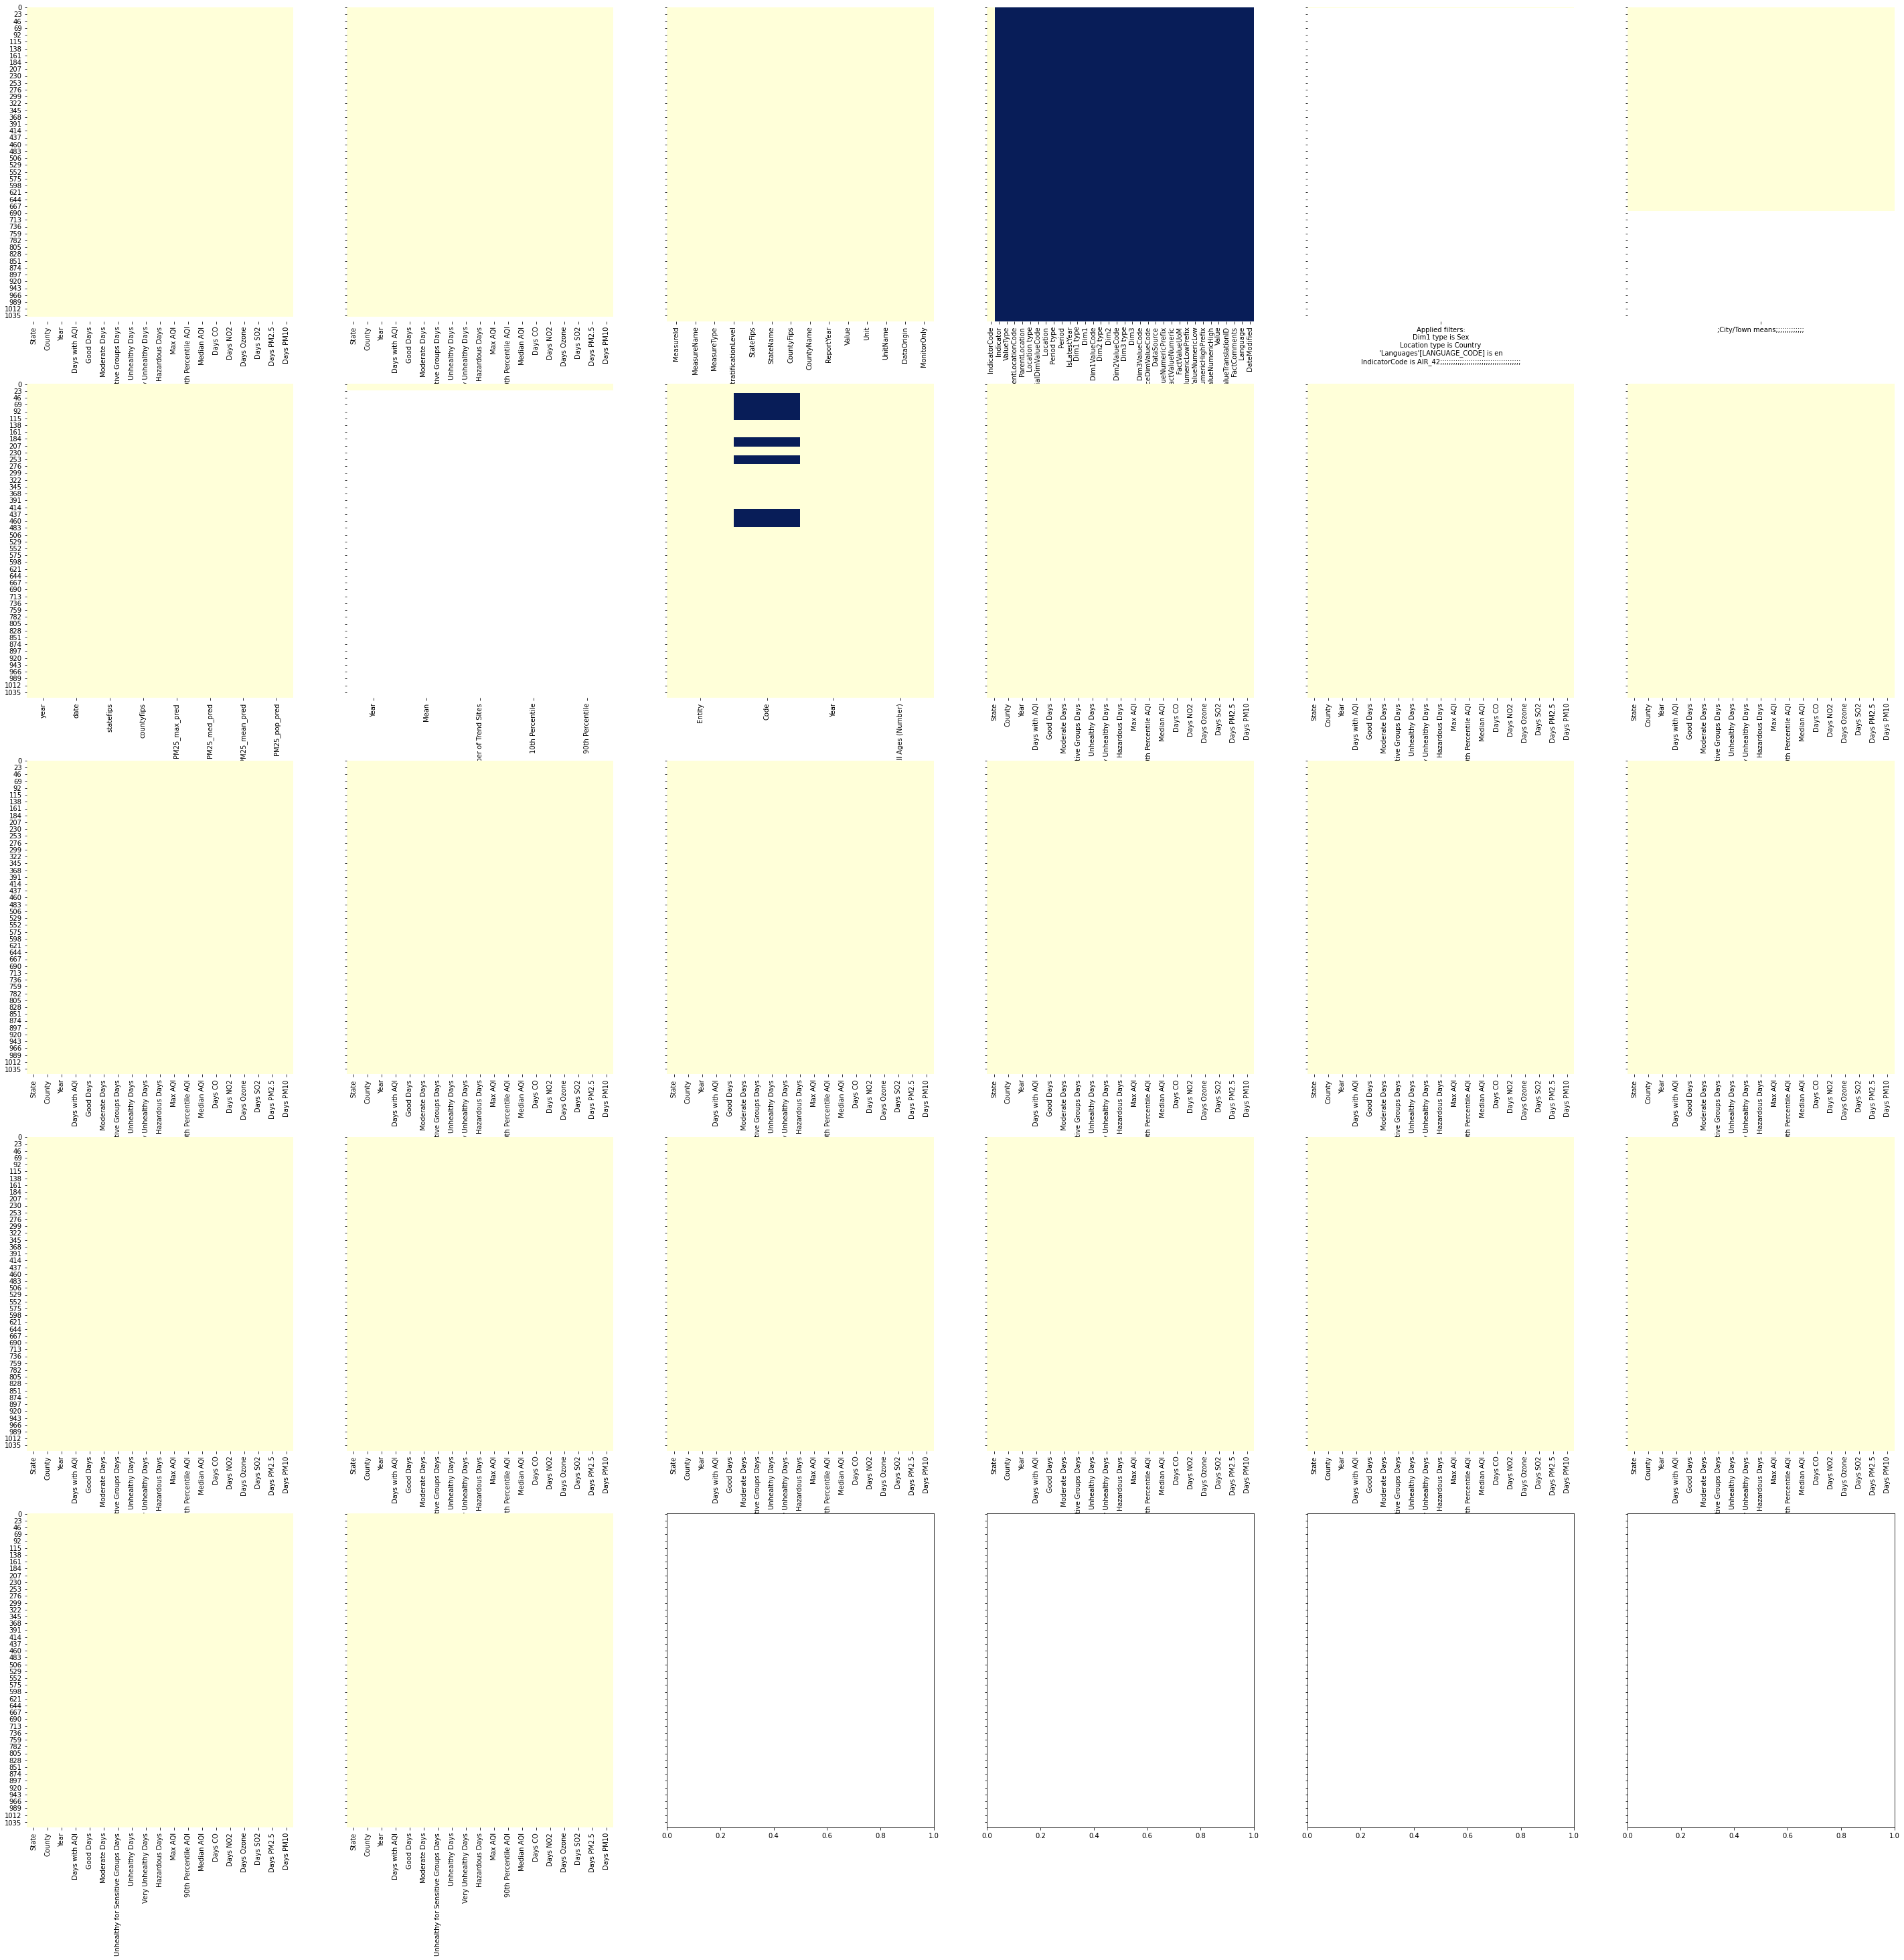

In [3]:
# CAREFUL: THIS TAKES A LONG TIME TO RUN
# Visualization of Null values
n = len(datasets)
keys = list(datasets.keys())
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(int(np.sqrt(n)),int(np.sqrt(n))+1, figsize=(50, 50), sharey=True)
for i in range(n):
    print("Progress: Step {}/{}".format(i+1,n))
    df = datasets[keys[i]]
    # Reference: https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj
    sns.heatmap(df.isnull(),cmap="YlGnBu", cbar=False, ax = axs.flat[i])

Our data is not emptyn we can proceed and perform EDA.

In [5]:
n = len(datasets)
keys = list(datasets.keys())
for i in range(n):
    df = datasets[keys[i]]
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1040 non-null   object
 1   County                               1040 non-null   object
 2   Year                                 1040 non-null   int64 
 3   Days with AQI                        1040 non-null   int64 
 4   Good Days                            1040 non-null   int64 
 5   Moderate Days                        1040 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1040 non-null   int64 
 7   Unhealthy Days                       1040 non-null   int64 
 8   Very Unhealthy Days                  1040 non-null   int64 
 9   Hazardous Days                       1040 non-null   int64 
 10  Max AQI                              1040 non-null   int64 
 11  90th Percentile AQI                  1040 n

# Relating death tolls, AQI, and PM2.5

One of our goals in this project is to relate deaths tolls of air pollution to the data we have in the dataset of the class. One way to do it is to use data from the WHO and relate deaths to PM2.5. However, we would like to predict death tolls using the Air Quality Index (AQI) since this is one of the few metrics we have in our original dataset. 

In [4]:
years = [str(i) for i in range(2001,2017)]
annual_aqi_us = datasets["annual_aqi_by_county_2000.csv"].loc[:,['Year', 'State', 'County','Median AQI']]
increment = 1
for year in years:
    df = datasets["annual_aqi_by_county_"+year+".csv"].loc[:,['Year', 'State', 'County','Median AQI']]
    annual_aqi_us = pd.concat([annual_aqi_us, df], axis=0)
    increment += 1

In [5]:
annual_aqi_us

Year    State      County  Median AQI
0     2000  Alabama     Baldwin          54
1     2000  Alabama        Clay          46
2     2000  Alabama     Colbert          16
3     2000  Alabama      DeKalb          51
4     2000  Alabama      Elmore          50
...    ...      ...         ...         ...
1049  2016  Wyoming    Sublette          44
1050  2016  Wyoming  Sweetwater          44
1051  2016  Wyoming       Teton          41
1052  2016  Wyoming       Uinta          42
1053  2016  Wyoming      Weston          41

[18815 rows x 4 columns]

In [14]:

states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

print(list(states.keys()))

d = dict(zip(tuple([i for i in range(1,len(states))]),tuple(states.keys()))) 

pm25_county = datasets["Daily_PM25_Concentrations_All_County_2001-2016.csv"]
pm25_county['county'] = pm25_county['statefips'].replace(d)
pm25_county_mean_year = pm25_county.loc[:,['year','county','PM25_med_pred']].groupby(['county','year']).mean()
pm25_county_mean_year

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


             PM25_med_pred
county year               
51     2001      13.086097
       2002      12.114008
       2003      11.961081
       2004      12.143240
       2005      12.472468
...                    ...
WV     2012       7.176230
       2013       7.022986
       2014       6.279201
       2015       6.271767
       2016       5.080239

[784 rows x 1 columns]


<AxesSubplot:xlabel='Median AQI', ylabel='PM25_med_pred'>

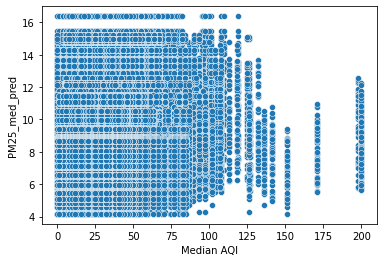

In [16]:
print(pm25_county_mean_year)
joined_aqi_pm25_us = pm25_county_mean_year.merge(annual_aqi_us, left_on = 'year', right_on = 'Year')
#joined_aqi_pm25_us['log Median AQI'] = joined_aqi_pm25_us['Median AQI'].apply(np.log)
#joined_aqi_pm25_us['Median AQI^2'] = joined_aqi_pm25_us['Median AQI'].apply(np.square)
#joined_aqi_pm25_us['Mean^2'] = joined_aqi_pm25_us['Mean'].apply(np.square)
sns.scatterplot(data = joined_aqi_pm25_us, y = 'PM25_med_pred', x = 'Median AQI')
#regularized_aqi_pm25_us = joined_aqi_pm25_us.apply(np.log)
#sns.scatterplot(data = regularized_aqi_pm25_us, x = 'Mean', y = 'Median AQI')

In [5]:
"""Source: https://github.com/jtemporal/folium-101"""
"""Look at: https://towardsdatascience.com/how-to-step-up-your-folium-choropleth-map-skills-17cf6de7c6fe"""
import folium

world = folium.Map(
    zoom_start=100,
    location=[13.133932434766733, 16.103938729508073])
world